Import Required Libraries


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


Load the Data

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')


Check for missing values,

In [4]:
print(train_data.info())  # to get data types and non-null counts
print(train_data.describe())  # to get basic statistics


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB
None
                 x           y
count   700.000000  699.000000
mean     54.985939   49.939869
std     134.681703   29.109217
min       0.000000   -3.839981
25%      25.000000   24.929968
50%      49.000000   48.973020
75%      75.000000   74.929911
max    3530.157369  108.871618


Handle Missing Values

If there are missing values in train_data or test_data, 

In [5]:
train_data.fillna(train_data.median(), inplace=True)
test_data.fillna(test_data.median(), inplace=True)


derfining independent vairable

In [7]:
X = train_data[['x','y']]
y = train_data['y']

detecing outliers

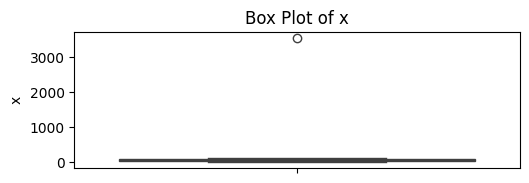

In [20]:
#detecting outliers
plt.figure(figsize=(10, 5))
for i, feature in enumerate(X):
    plt.subplot(3, 2, i+1)  # Creating a subplot for each feature
    sns.boxplot(y=X['x'])  # Create a boxplot
    plt.title(f'Box Plot of {feature}')
    plt.ylabel(feature)

plt.tight_layout()  # Adjust layout
plt.show()

delete outliers

In [9]:
# Define features and target
X = train_data[['x']]
y = train_data['y']

# Calculate IQR for outlier detection
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows with outliers
X_no_outliers = X[~((X < lower_bound) | (X > upper_bound)).any(axis=1)]
y_no_outliers = y[X_no_outliers.index]

# Update train_data to keep only non-outlier rows
train_data_cleaned = pd.DataFrame({'x': X_no_outliers['x'], 'y': y_no_outliers})


Split Data into Train and Test Sets

In [11]:
# Separate features and target in train_data_cleaned

X_train = train_data_cleaned[['x']]
y_train = train_data_cleaned['y']

# Extract features and target in test_data
X_test = test_data[['x']]
y_test = test_data['y']


Train the Linear Regression Model

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Make Predictions

In [13]:
y_pred = model.predict(X_test)


Evaluate the Model

In [16]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")


Mean Squared Error: 9.432922192039317
R-squared (R²): 0.9888014444327563


Visualize the Results

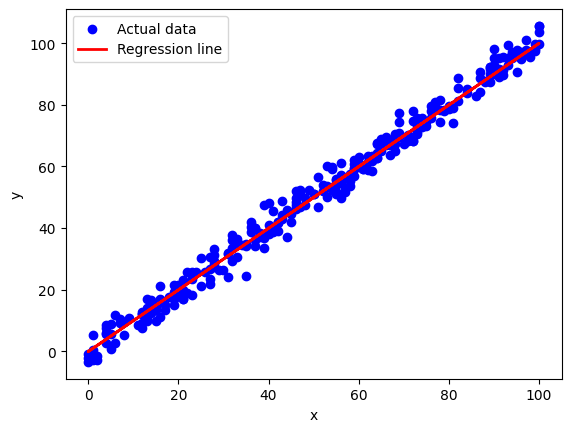

In [17]:
plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
